### Projet regression lineaire : 

- groupe : Jerôme & Lauriane & Louise & Esperance 

# Consignes 
- _une partie de récupération et de cleaning de données_

- _une partie découpage de données en deux dataset: un de training et un de testing_

- _une partie d'entrainement d'un modèle de régression linéaire faisant appelle à Scikit learn_

- _une partie d'évaluation du modèle (sur le train et sur le test)_

- _une proposition d'amélioration de ce score_

## 1. Récuperation & cleaning de données

In [1]:
#Librairies 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [2]:
#reading dataset::
data = pd.read_csv("Fish.csv")

In [3]:
# printing the five first rows of our dataset: 
data.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


- Data name : Fish est une base de données qui porte sur 7 espèces de poissons voir colonne Species 
avec les colonnes sur les differentes dimensions de ces espèces (3 longueurs, 1 hauteur, 1 largeur et la masse)

In [4]:
#shape of our Dataset :
print("Row and columns of Fishdata:")
data.shape

Row and columns of Fishdata:


(159, 7)

- Il y a 159 lignes pour 7 colonnes

In [5]:
#information sur le type de données 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
#description of the dataset: 
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
#Vérifications des valeurs manquantes
data.isna().any()

Species    False
Weight     False
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

In [8]:
#Vérifions des doublons
data.duplicated().any()

False

## _visualisation_ 

- La fonction pairplot permet de visualiser les relations par paire de variables et par espece grace à : hue ="Species". 
- Cette fonction nous donne aussi les histogrammes par variable pour chaque espèce.  

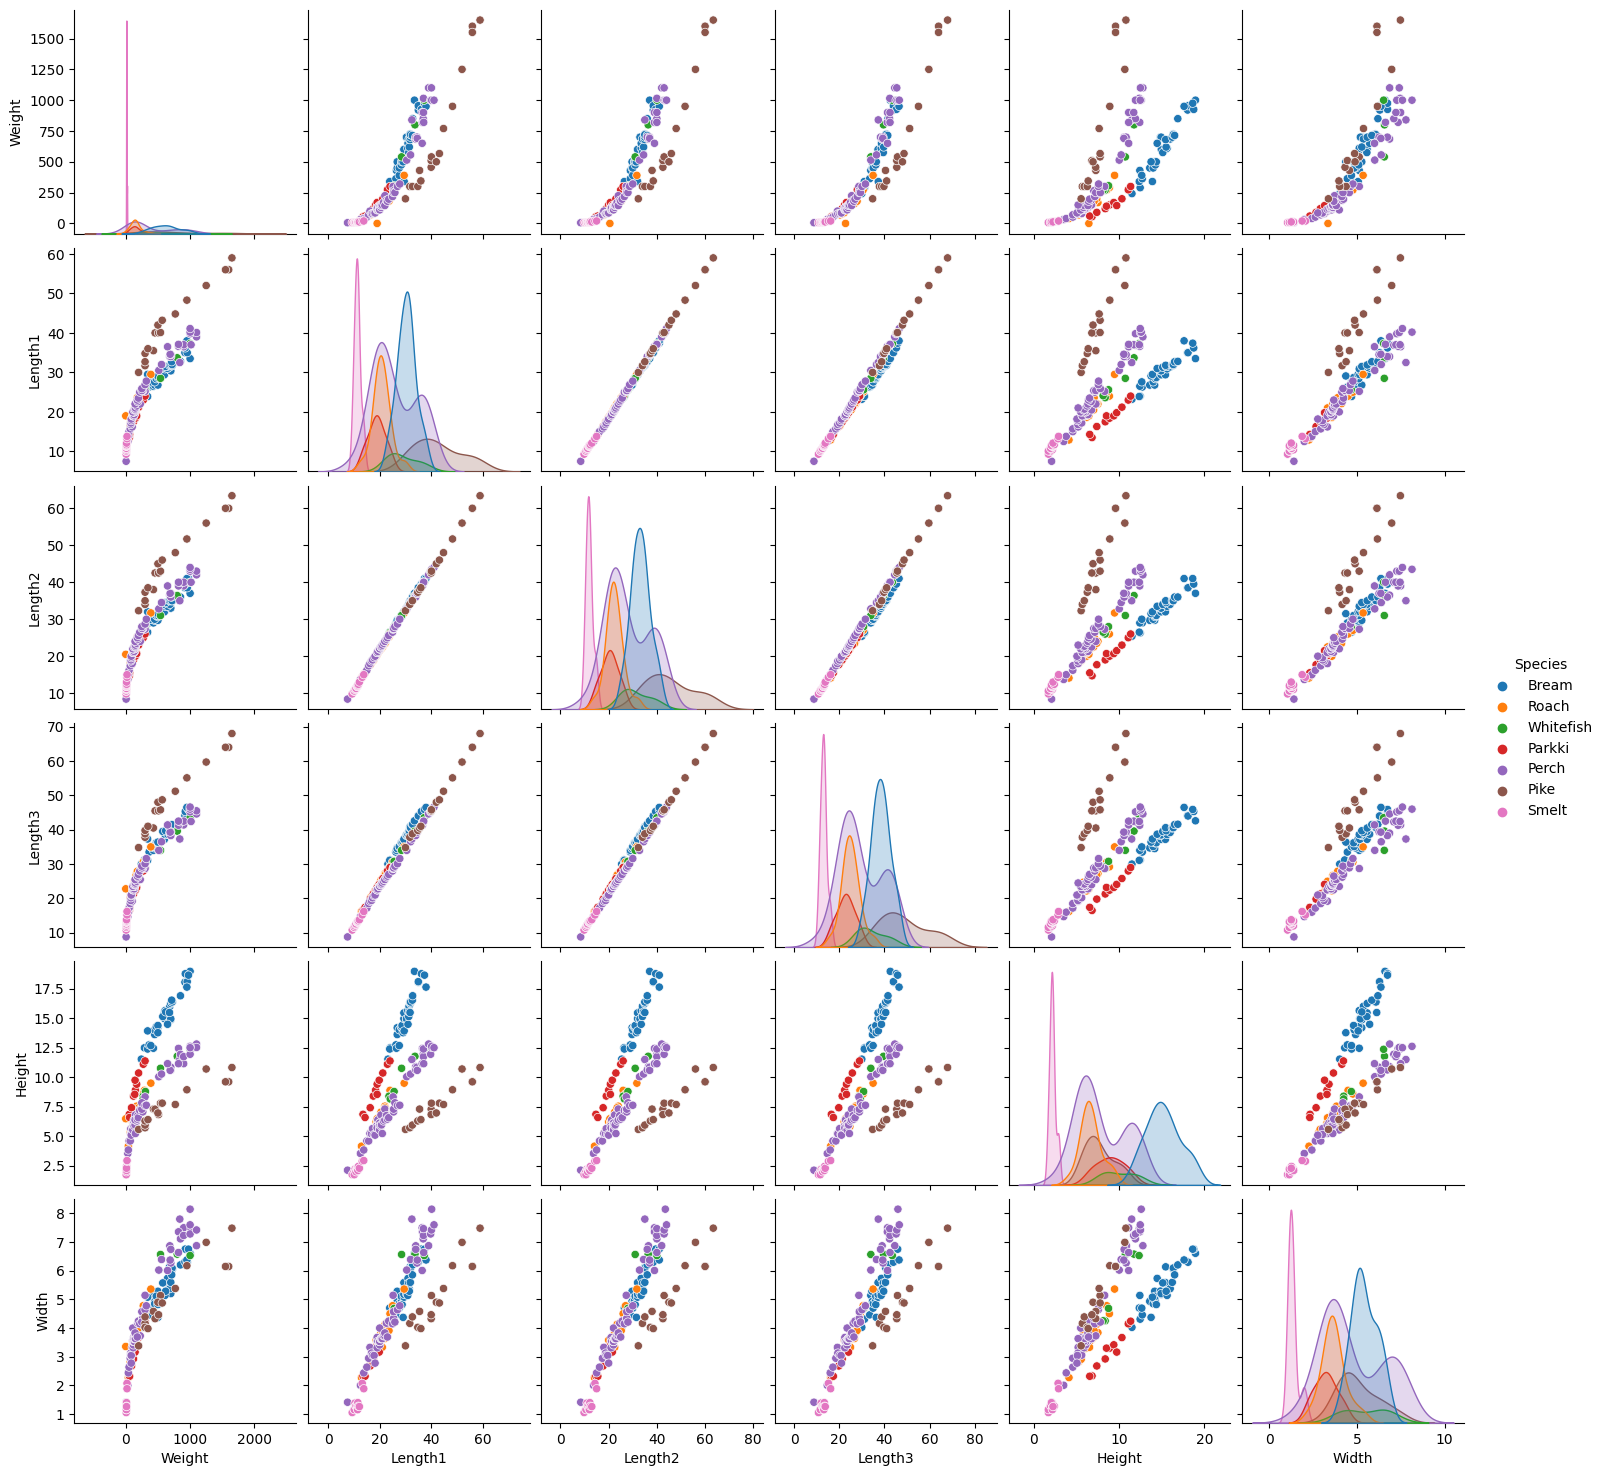

In [9]:
#visualisation des données :
sns.pairplot(data, hue ="Species")
plt.show()

In [10]:
# Numbers of fish by species : 
data["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

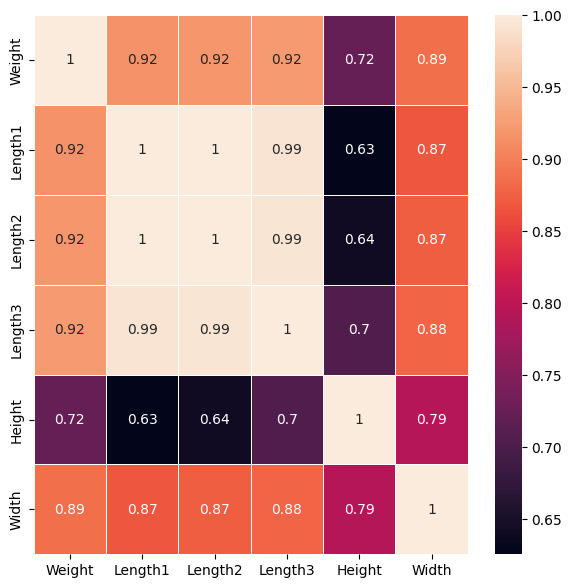

In [11]:
#montrer la correlation entre les features
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(), annot=True,linewidth=.5)
plt.show()

La heatmap met en évidence une forte dependance entre les differentes variables de dimensions des poissons. 
Elles sont cependant toutes fortement corrélées avec la masse. Un modèle avec une seule variable dimension + la variable categorielle espèce nous permettrait de prédire au mieux la masse des poissons. 

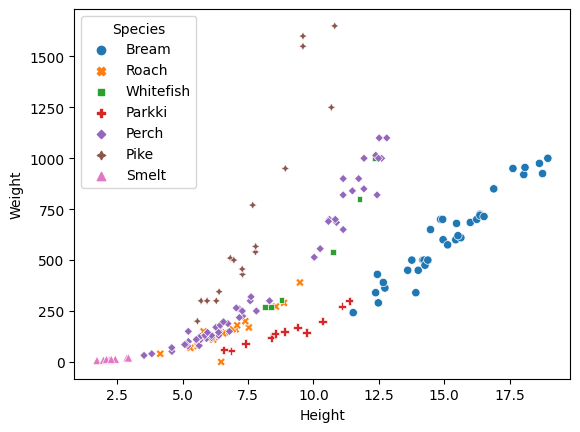

In [12]:
sns.scatterplot(data=data, x="Height", y ="Weight", hue="Species", style="Species")
plt.show()

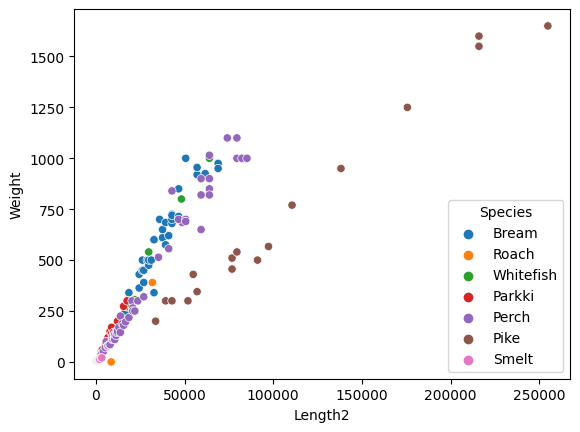

In [13]:
l2 = data["Length2"]**3
sns.scatterplot(x=l2, y=data["Weight"], hue= data["Species"])
plt.show()

## 2.Découpage de données en dataset: training & testing

Pour notre modèle: 
  target : la masse des poissons (Weight)
  features: Length1 & Species

In [14]:
#Extracting our target : y 
y =data["Weight"]
#extraire les features : 
X = data[["Length1","Species"]]
#Transformation de la variable categorielle: Species
X = pd.get_dummies(X)
#On ajoute une colonne de valeur constante (i.e. 1) afin d'inclure le calcul de l'ordonnée à l'origine (intercept) 
X["Intercept"]=1
X.head(5)

,Length1,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish,Intercept
0,23.2,1,0,0,0,0,0,0,1
1,24.0,1,0,0,0,0,0,0,1
2,23.9,1,0,0,0,0,0,0,1
3,26.3,1,0,0,0,0,0,0,1
4,26.5,1,0,0,0,0,0,0,1


In [15]:
#Decoupage de notre data en 80/20 : 80% pour le train & 20% pour le test
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 10)

## 3. Entrainement d'un modèle de regression lineaire :: scikit learn

In [16]:
#choix du modèle: Regresson linéaire 
model = LinearRegression()
#Entrainement du modèle : .fit()
model.fit(X_train, y_train)

LinearRegression()

## 4. Evaluation du modele (train & test)

In [17]:
#evaluation du modèle :: .score()
print(f"le premier score Rscore 1 : {model.score(X_test,y_test)}")

le premier score Rscore 1 : 0.8412076635101906


## 5. Proposition d'amélioration du score 

In [18]:
#To check our model , we make a prediction 
y_predic= model.predict(X_test)

- Verifier la condition de la distribution normalisé des erreurs 

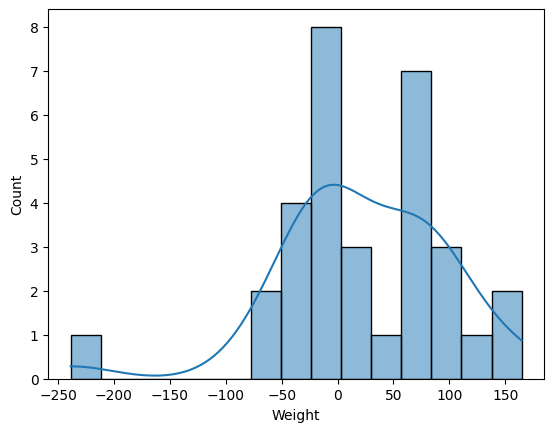

In [19]:
residus = y_predic - y_test
sns.histplot(residus, bins=15, kde=True)
plt.show()

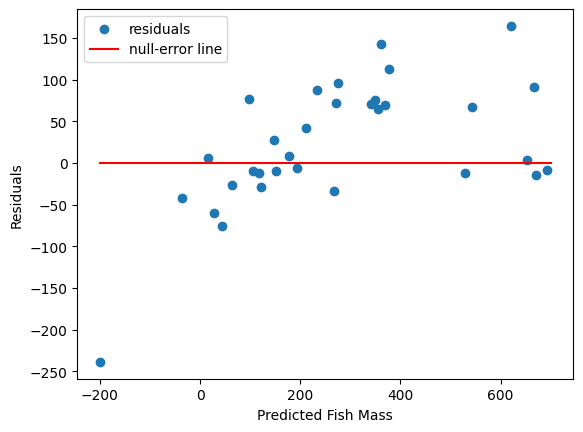

In [20]:
plt.scatter(y_predic, residus, label = 'residuals')
plt.plot([-200,700], [0,0], c ='r', label = 'null-error line')
plt.xlabel('Predicted Fish Mass')
plt.ylabel('Residuals')
plt.legend()
plt.show()

La répartition des résidus ne semble par non plus homoscédastique >>> répartition des résidus de manière non-homogène 

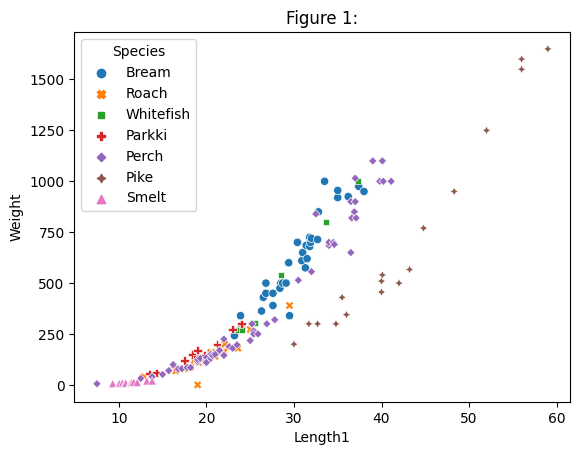

In [21]:
#Visualisation de la non linéarité entre x & y 
sns.scatterplot(data=data, x="Length1", y ="Weight", hue="Species", style="Species")
plt.title("Figure 1:")
plt.show()

- La distribution des residus ne suit pas une loi normale donc la condition n'est pas respectée.
- Les raisons : 
  - D'après la visualisation Figure 1 , il n'y aurai pas de relaiton linéaire entre x & y 
  - il n'y pas d'ajustement de pente entre espèces 

- Donc pour améliorer notre modèle, nous proposons de transformer X:
   la masse étant proportionnelle au volume, nous allons calculer une feature volume.

In [22]:
# New column Volume:
data["Volume"] = data["Length1"]*data["Height"]*data["Width"]

In [23]:
data.head(2)

,Species,Weight,Length1,Length2,Length3,Height,Width,Volume
0,Bream,242.0,23.2,25.4,30.0,11.52,4.0200,1074.401280
1,Bream,290.0,24.0,26.3,31.2,12.48,4.3056,1289.613312


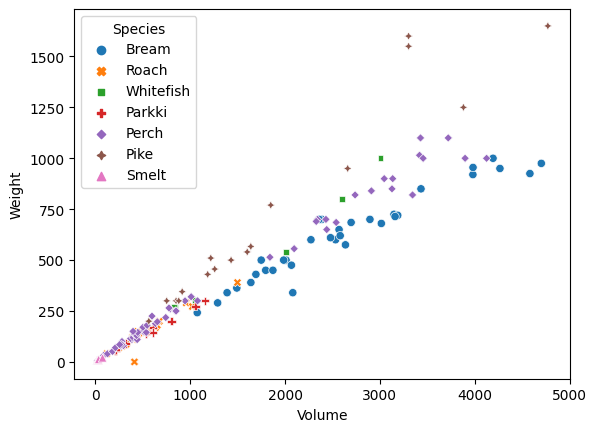

In [24]:
#Visualisation 
sns.scatterplot(data=data, x="Volume", y ="Weight", hue="Species", style="Species")
plt.show()

On ré-itère le même process que précedemment... avec la variable Volume

In [25]:
#Extracting our target : y 
y =data["Weight"]
#extraire les features : 
X = data[["Volume","Species"]]
#Transformation de la variable categorielle: Species
X = pd.get_dummies(X)
#On ajoute une colonne de valeur constante (i.e. 1) afin d'inclure le calcul de l'ordonnée à l'origine (intercept) 
X["Intercept"]=1
X.head(5)

,Volume,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish,Intercept
0,1074.401280,1,0,0,0,0,0,0,1
1,1289.613312,1,0,0,0,0,0,0,1
2,1389.244539,1,0,0,0,0,0,0,1
3,1491.696945,1,0,0,0,0,0,0,1
4,1693.018644,1,0,0,0,0,0,0,1


In [26]:
#Decoupage de notre data en 80/20 : 80% pour le train & 20% pour le test
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 10)

In [27]:
#choix du modèle: Regresson linéaire 
model2 = LinearRegression()
#Entrainement du modèle : .fit()
model2.fit(X_train, y_train)

LinearRegression()

In [28]:
#evaluation du modèle :: .score()
print(f"le second score Rscore 2 : {model2.score(X_test,y_test)}")

le second score Rscore 2 : 0.9323080851415603


In [29]:
#To check our model , we make a prediction 
y_predic = model2.predict(X_test)

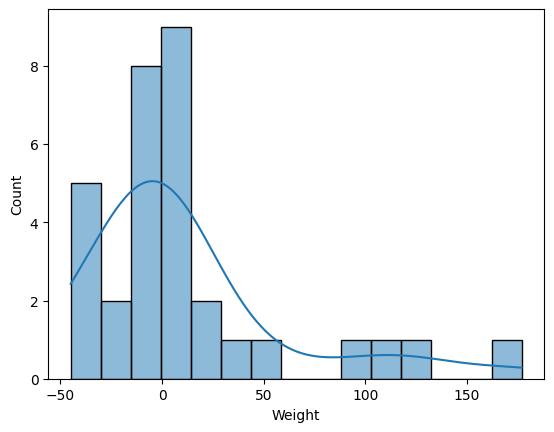

In [30]:
residus = y_predic - y_test
sns.histplot(residus, bins=15, kde=True)
plt.show()

La distribution des résidus ne semble pas suivre une loi normale

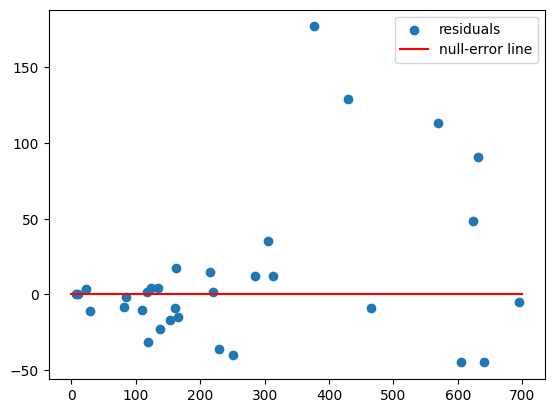

In [31]:
plt.scatter(y_predic, residus, label = 'residuals')
plt.plot([-200,700], [0,0], c ='r', label = 'null-error line')
plt.xlabel('Predicted Fish Mass')
plt.ylabel('Residuals')
plt.legend()
plt.show()

La répartition des résidus ne semble par non plus homoscédastique, bien qu'améliorée

In [32]:
y_test = y_test.reset_index()
y_test['predict'] = y_predic
X_test = X_test.reset_index()
y_test['Volume'] = X_test['Volume']
y_test.head()

,index,Weight,predict,Volume
0,35,40.0,28.914866,121.335460
1,85,130.0,134.425649,435.428381
2,47,160.0,137.490747,513.152000
3,24,700.0,695.281945,2895.504129
4,129,300.0,429.206163,752.337127


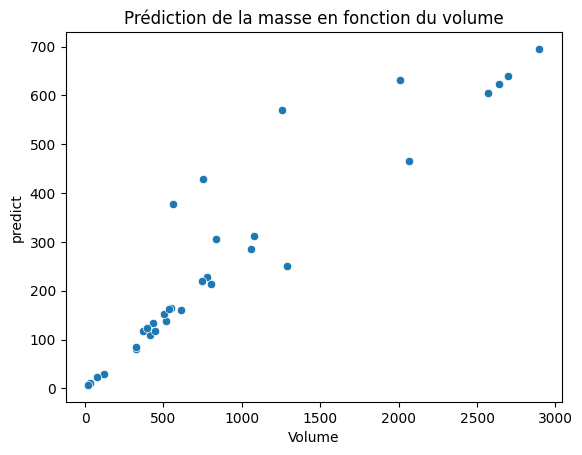

In [33]:
sns.scatterplot(data=y_test, x="Volume", y ="predict")
plt.title('Prédiction de la masse en fonction du volume')
plt.show()

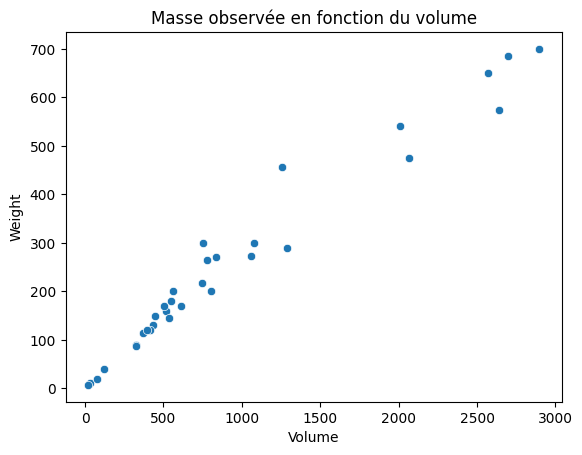

In [34]:
sns.scatterplot(data=y_test, x="Volume", y ="Weight")
plt.title('Masse observée en fonction du volume')
plt.show()

Authorisons la pente d'être ajustée au sein du modèle pour chaque espèce de poisson. Il faut rajouter 7 colonnes similaires à celles obtenues avec get_dummies sur les espèces, à la différences qu'elles ne contiendront pas des constantes mais les variables Volume. 

In [35]:
list_species = ['Species_Bream', 'Species_Parkki', 'Species_Perch',
       'Species_Pike', 'Species_Roach', 'Species_Smelt', 'Species_Whitefish']

for species in list_species:
    X[f'{species}_slope'] = X[species] * X['Volume']

In [36]:
X.head(5)

,Volume,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish,Intercept,Species_Bream_slope,Species_Parkki_slope,Species_Perch_slope,Species_Pike_slope,Species_Roach_slope,Species_Smelt_slope,Species_Whitefish_slope
0,1074.401280,1,0,0,0,0,0,0,1,1074.401280,0.0,0.0,0.0,0.0,0.0,0.0
1,1289.613312,1,0,0,0,0,0,0,1,1289.613312,0.0,0.0,0.0,0.0,0.0,0.0
2,1389.244539,1,0,0,0,0,0,0,1,1389.244539,0.0,0.0,0.0,0.0,0.0,0.0
3,1491.696945,1,0,0,0,0,0,0,1,1491.696945,0.0,0.0,0.0,0.0,0.0,0.0
4,1693.018644,1,0,0,0,0,0,0,1,1693.018644,0.0,0.0,0.0,0.0,0.0,0.0


Ré-itérons le même process que précédemment

In [37]:
#Decoupage de notre data en 80/20 : 80% pour le train & 20% pour le test
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 10)

In [38]:
#choix du modèle: Regresson linéaire 
model3 = LinearRegression()
#Entrainement du modèle : .fit()
model3.fit(X_train, y_train)

LinearRegression()

In [39]:
#evaluation du modèle :: .score()
print(f"le troisème score Rscore 2 : {model3.score(X_test,y_test)}")

le troisème score Rscore 2 : 0.9782956771573231


In [40]:
#To check our model , we make a prediction 
y_predic = model3.predict(X_test)

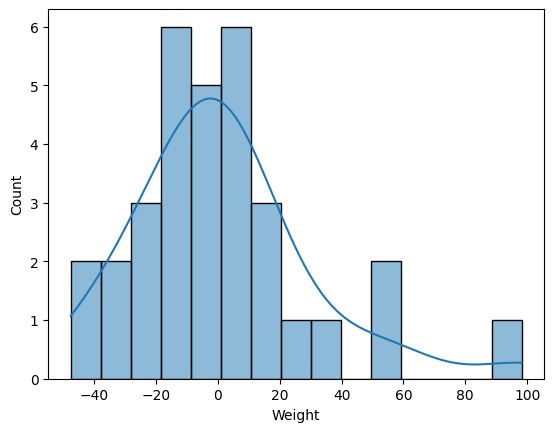

In [41]:
residus = y_predic - y_test
sns.histplot(residus, bins=15, kde=True)
plt.show()

La distribution des résidues semble être amélioré même si elle ne suit pas parfaitement la loi normale 

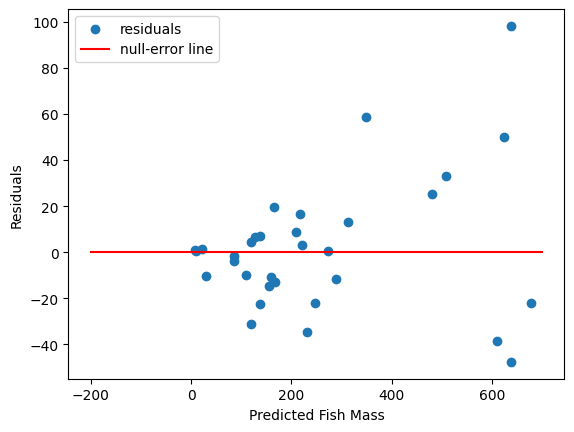

In [46]:
plt.scatter(y_predic, residus, label = 'residuals')
plt.plot([-200,700], [0,0], c ='r', label = 'null-error line')
plt.xlabel('Predicted Fish Mass')
plt.ylabel('Residuals')
plt.legend()
plt.show()

La répartition des résidus ne semble par non plus homoscédastique (augmentation de la variance des résidus avec la masse), bien qu'elle soit améliorer par rapport aux autres modèles (répartition homogène de part et d'autre de la ligne pour laquelle l'erreur est zéro)

In [42]:
y_test = y_test.reset_index()
y_test['predict'] = y_predic
X_test = X_test.reset_index()
y_test['Volume'] = X_test['Volume']
y_test.head()

,index,Weight,predict,Volume
0,35,40.0,29.513193,121.335460
1,85,130.0,136.954357,435.428381
2,47,160.0,137.613792,513.152000
3,24,700.0,678.145887,2895.504129
4,129,300.0,288.441733,752.337127


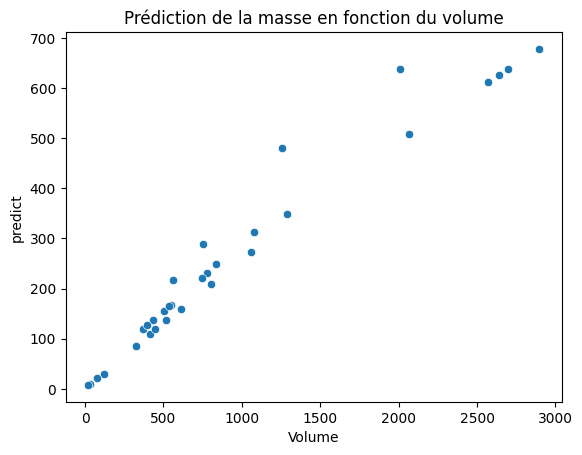

In [43]:
sns.scatterplot(data=y_test, x="Volume", y ="predict")
plt.title('Prédiction de la masse en fonction du volume')
plt.show()

Comparons les valeurs observées aux valeurs prédites

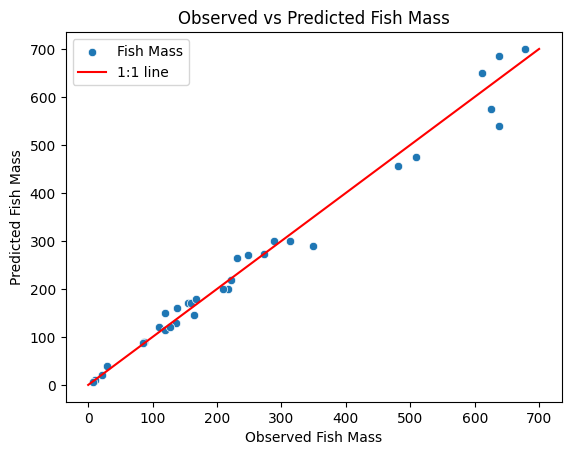

In [44]:
sns.scatterplot(data=y_test, x="predict", y ="Weight", label = 'Fish Mass')
plt.plot([0,700],[0,700], c = 'r', label = '1:1 line')
plt.title('Observed vs Predicted Fish Mass')
plt.xlabel('Observed Fish Mass')
plt.ylabel('Predicted Fish Mass')
plt.legend()
plt.show()

In [45]:
y_test_1['predict'] = y_1_predic
y_test_1['Volume'] = X_test_1['Volume']
X_train_1b, X_test_1b, y_train_1b, y_test_1b = train_test_split(X_1, y_1, test_size=0.2, random_state = 10)
y_test_1['Species'] = X_test_1b['Species']

NameError: name 'y_1_predic' is not defined

In [ ]:
#Visualisation 
sns.scatterplot(data=data, x="Volume", y ="Weight", hue="Species", style="Species")
plt.show()

In [ ]:
#Extracting our target : y 
y_1 = data["Weight"]

In [ ]:
#Extracting our new feature : volume
#extraire les features : 
X_1 = new_data[["Volume","Species"]]

In [ ]:
X_1["Intercept"]=1
X_1.head(5)

In [ ]:
#Transformation de la variable categorielle: Species
X_1b = pd.get_dummies(X_1)

In [ ]:
#New spliting 
#Decoupage de notre data en 80/20 : 80% pour le train & 20% pour le test
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1b, y_1, test_size=0.2, random_state = 10)

In [ ]:
#choix du modèle: Regresson linéaire 
new_model = LinearRegression()

In [ ]:
#Training
new_model.fit(X_train_1,y_train_1)

In [ ]:
#evaluation du modèle :: .score()
print(f"le premier score Rscore 2 : {new_model.score(X_test_1,y_test_1)}")

In [ ]:
y_1_predic = new_model.predict(X_test_1)
residus_new = y_1_predic - y_test_1
sns.histplot(residus_new, bins=20, kde=True)
plt.show()

La aussi la distribution des résidus ne suit pas une loi normale. Regardons les valeurs prédictes par rapport aux valeurs de volume.  

In [ ]:
y_test_1['predict'] = y_1_predic
y_test_1['Volume'] = X_test_1['Volume']
X_train_1b, X_test_1b, y_train_1b, y_test_1b = train_test_split(X_1, y_1, test_size=0.2, random_state = 10)
y_test_1['Species'] = X_test_1b['Species']


In [ ]:
y_test_1

In [ ]:
sns.scatterplot('predict', 'Weight', data = y_test_1, hue = 'Species')
plt.show()

##**************************

In [ ]:
X_1.columns

In [ ]:
X_1[['Species_Bream_1', 'Species_Parkki_1',
       'Species_Perch_1', 'Species_Pike_1', 'Species_Roach_1', 'Species_Smelt_1',
       'Species_Whitefish_1']] = X_1[['Species_Bream', 'Species_Parkki',
       'Species_Perch', 'Species_Pike', 'Species_Roach', 'Species_Smelt',
       'Species_Whitefish']] * X_1[["Volume"]]

In [ ]:
new_df = y_test.copy()
new_df = new_df.reset_index()

In [ ]:
new_df["predict"] = y_predic

In [ ]:
new_df = new_df.drop(["index"], axis=1)


In [ ]:
new_df

In [ ]:
sns.scatterplot(data=new_df, x="Weight", y ="predict");
plt.plot([0,600],[0,600])

In [ ]:
new_df["Length1"] = X_test.reset_index()["Length1"]

In [ ]:
new_df.head(3)

In [ ]:
sns.scatterplot(data=new_df, x="Length1", y ="predict");
#plt.plot([0,600],[0,600])